
Outputs for my_dataframe.csv, a balanced dataset with all the featue values

In [2]:
import pandas as pd
df = pd.read_csv('my_dataframe.csv',encoding='utf-8')
df.head()  #spoken=1  written=0

,texts,label,parse_tree_depth,noun_count_hi,verb_count_hi,adverb_count_hi,pronoun_count_hi,total_words_hi,noun_percentage_hi,verb_percentage_hi,...,pronoun_percentage_hi,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,2,7,2,0,0,28,25.000000,7.142857,...,0.000000,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,2,2,1,0,1,13,15.384615,7.692308,...,7.692308,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0
2,हमे इन्तजार है ।,1,1,1,0,0,1,4,25.000000,0.000000,...,25.000000,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,2,3,1,0,1,11,27.272727,9.090909,...,9.090909,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0
4,जयपुर,0,0,0,0,0,0,1,0.000000,0.000000,...,0.000000,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0


In [3]:
df.isnull().sum()

texts                      0
label                      0
parse_tree_depth           0
noun_count_hi              0
verb_count_hi              0
adverb_count_hi            0
pronoun_count_hi           0
total_words_hi             0
noun_percentage_hi         0
verb_percentage_hi         0
adverb_percentage_hi       0
pronoun_percentage_hi      0
words_per_sent             0
avg_characters_per_word    0
token_type_ratio           0
case_marker_perc           0
case_marker_count          0
conjunction_count          0
conjunctions_percentage    0
hesitation_markers         0
wh_question_count          0
dtype: int64

In [4]:
df = df.drop(columns=['total_words_hi'])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# Separate features and target
X = df.drop('label', axis=1)
X = X.drop('texts', axis=1)
y = df['label']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

1. Random Forest Classifier


In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf.predict(X_test)

# Calculate the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

label_mapping = {
    0: "written",
    1: "spoken"
}

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[label_mapping[0], label_mapping[1]]))

Accuracy: 0.8932540708193332

Classification Report:
              precision    recall  f1-score   support

     written       0.89      0.89      0.89      3826
      spoken       0.89      0.90      0.89      3912

    accuracy                           0.89      7738
   macro avg       0.89      0.89      0.89      7738
weighted avg       0.89      0.89      0.89      7738



<ipython-input-12-275f9d1eda65>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[importance for _, importance in features_sorted], y=[feature for feature, _ in features_sorted], palette="viridis", alpha=0.8)


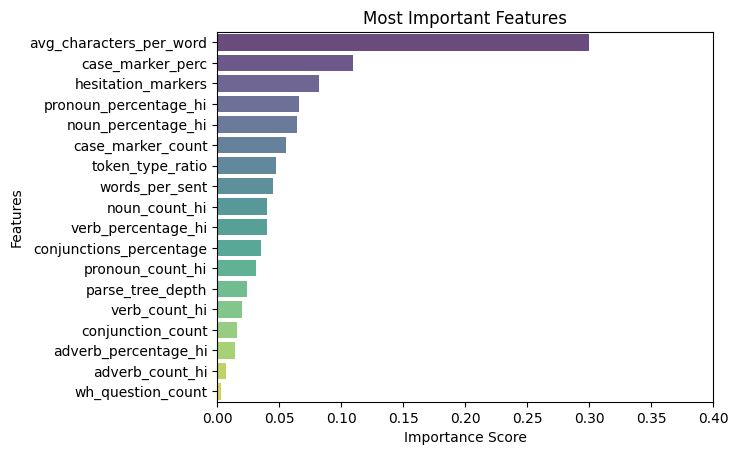

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf.feature_importances_

# Sort features and importances
features_sorted = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Create a horizontal bar chart with color and transparency
ax = sns.barplot(x=[importance for _, importance in features_sorted], y=[feature for feature, _ in features_sorted], palette="viridis", alpha=0.8)

# Set the title, labels, and limits
plt.title("Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.xlim([0, 0.4])
plt.show()

2. Support Vector Machine (SVM) Classifier

In [13]:
from sklearn.svm import SVC

In [21]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Accuracy:", accuracy_svm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=[label_mapping[0], label_mapping[1]]))


SVM Accuracy: 0.8724476608942879

Classification Report:
              precision    recall  f1-score   support

     written       0.86      0.88      0.87      3826
      spoken       0.88      0.86      0.87      3912

    accuracy                           0.87      7738
   macro avg       0.87      0.87      0.87      7738
weighted avg       0.87      0.87      0.87      7738



3. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [22]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("\nLogistic Regression Accuracy:", accuracy_logistic)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic, target_names=[label_mapping[0], label_mapping[1]]))


Logistic Regression Accuracy: 0.8476350478159731

Classification Report:
              precision    recall  f1-score   support

     written       0.84      0.86      0.85      3826
      spoken       0.86      0.83      0.85      3912

    accuracy                           0.85      7738
   macro avg       0.85      0.85      0.85      7738
weighted avg       0.85      0.85      0.85      7738



4. Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("\nDecision Tree Accuracy:", accuracy_decision_tree)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_decision_tree, target_names=[label_mapping[0], label_mapping[1]]))


Decision Tree Accuracy: 0.8380718531920393

Classification Report:
              precision    recall  f1-score   support

     written       0.85      0.82      0.83      3826
      spoken       0.83      0.85      0.84      3912

    accuracy                           0.84      7738
   macro avg       0.84      0.84      0.84      7738
weighted avg       0.84      0.84      0.84      7738

